In [1]:
from simply import redshift
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
%config InlineBackend.figure_format ='retina'

## NSF Transactions vs. MCC Code 6051 - Linear Regression

In [3]:
nsf_mcc = redshift("""query_nsf_mcc.sql""")

In [16]:
nsf_mcc_v2 = nsf_mcc[nsf_mcc.num_nsf_transactions_last_120 != 0]

In [17]:
nsf_mcc_v2.describe()

,num_nsf_transactions_last_120,num_mcc_6051_transactions_last_120
count,99420.000000,99420.000000
mean,24.206226,7.971042
std,46.605219,31.028078
min,1.000000,0.000000
25%,3.000000,0.000000
50%,9.000000,0.000000
75%,26.000000,2.000000
max,2851.000000,1968.000000


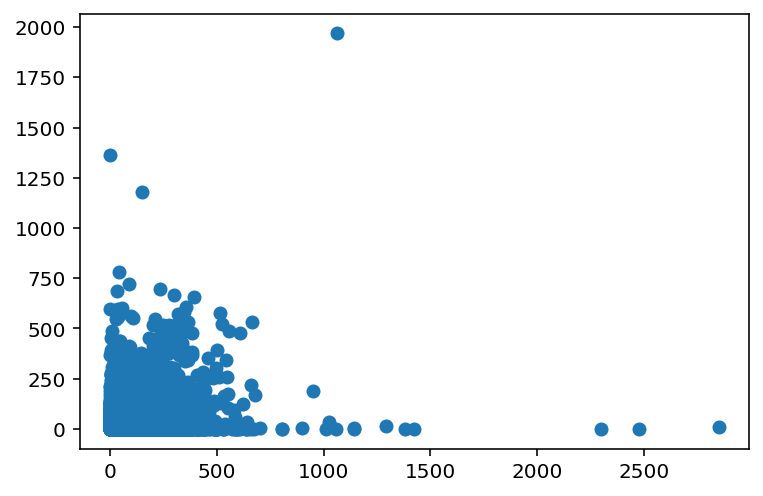

In [18]:
plt.scatter(nsf_mcc_v2.num_nsf_transactions_last_120, nsf_mcc_v2.num_mcc_6051_transactions_last_120)

In [19]:
model = sm.OLS(nsf_mcc_v2.num_nsf_transactions_last_120, nsf_mcc_v2.num_mcc_6051_transactions_last_120)

In [20]:
results = model.fit()

In [21]:
print(results.summary())

                                      OLS Regression Results                                      
Dep. Variable:     num_nsf_transactions_last_120   R-squared (uncentered):                   0.156
Model:                                       OLS   Adj. R-squared (uncentered):              0.156
Method:                            Least Squares   F-statistic:                          1.831e+04
Date:                           Mon, 28 Sep 2020   Prob (F-statistic):                        0.00
Time:                                   16:12:02   Log-Likelihood:                     -5.2648e+05
No. Observations:                          99420   AIC:                                  1.053e+06
Df Residuals:                              99419   BIC:                                  1.053e+06
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
          

## Simple Customers Age Group

In [22]:
age = redshift("""
select
    user_ref,
    age
from dim_user
where num_open_accounts > 0
""")

In [26]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or seque

(array([5.6450e+03, 1.7207e+04, 2.9227e+04, 3.8385e+04, 4.7279e+04,
        5.3561e+04, 5.2889e+04, 4.7884e+04, 6.1745e+04, 3.4832e+04,
        2.9980e+04, 2.4324e+04, 1.9768e+04, 1.6598e+04, 1.4707e+04,
        1.3899e+04, 1.5659e+04, 8.6750e+03, 7.6190e+03, 6.6180e+03,
        5.4850e+03, 4.5660e+03, 3.6770e+03, 2.9370e+03, 3.1870e+03,
        1.5050e+03, 1.0840e+03, 6.5300e+02, 4.7500e+02, 3.4300e+02,
        2.4100e+02, 1.4700e+02, 1.5000e+02, 9.0000e+01, 4.4000e+01,
        2.8000e+01, 1.4000e+01, 1.0000e+01, 8.0000e+00, 7.0000e+00]),
 array([ 17.   ,  19.125,  21.25 ,  23.375,  25.5  ,  27.625,  29.75 ,
         31.875,  34.   ,  36.125,  38.25 ,  40.375,  42.5  ,  44.625,
         46.75 ,  48.875,  51.   ,  53.125,  55.25 ,  57.375,  59.5  ,
         61.625,  63.75 ,  65.875,  68.   ,  70.125,  72.25 ,  74.375,
         76.5  ,  78.625,  80.75 ,  82.875,  85.   ,  87.125,  89.25 ,
         91.375,  93.5  ,  95.625,  97.75 ,  99.875, 102.   ]),
 <a list of 40 Patch objects>)

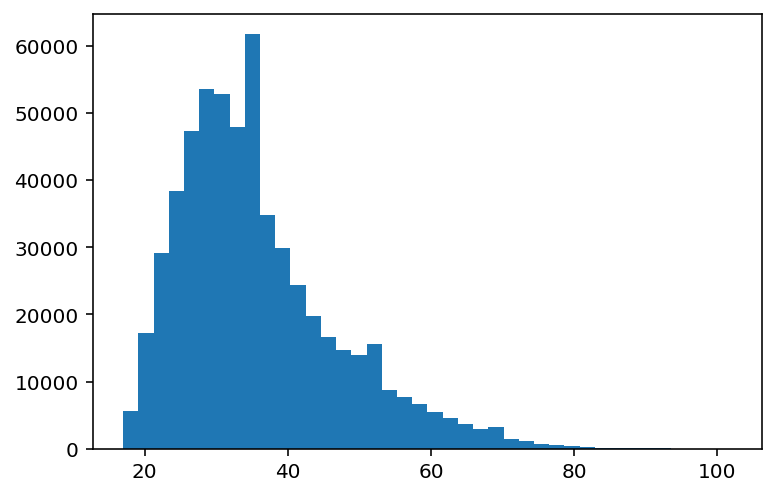

In [38]:
plt.hist(age.age, bins = 40)